In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_percentage_error as mape
    
)
from statsforecast import StatsForecast

from statsforecast.models import (
    AutoARIMA,
    HistoricAverage,
    RandomWalkWithDrift,
    SeasonalNaive
)

## Biblioteca base

- Aqui, será usado com base a biblioteca [statsforecast](https://nixtla.github.io/statsforecast/), a qual fornece métodos importantes e de fácil utilização para avaliação de multiplas séries temporais, além de diversos modelos em seu catálogo.

## Métricas de avaliação

Como métricas de avaliação, utilizaremos a Root Mean Squared Error (RMSE) e Mean Absolut Percentage Error (MAPE)

### Root Mean Squared Error

$\sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$


- O RMSE é a raiz quadrada da média dos erros quadrados entre os valores previstos e reais.
- Devido à elevação ao quadrado, o RMSE é mais sensível a valores discrepantes do que o MAPE, tendo como intuito de utilização justamente observar erros mais discrepantes, além da distribuição dos mesmos, pois estão na mesma unidade de medida dos valores reais.
- Quanto mais próximo de zero o RMSE, melhor o desempenho do modelo.

### Mean Absolut Percentage Error

$\frac{1}{n} \sum_{i=1}^{n} \left| \frac{y_i - \hat{y}_i}{y_i} \right| \times 100$


- O MAPE é uma média de diferenças percentuais absolutas entre os valores previstos e reais.
- É expresso como uma porcentagem, tornando fácil de entender e comparar com os valores da base de dados.
- O MAPE é menos sensível a valores discrepantes do que o RMSE, no entanto, pode ser problemático quando os valores reais estão próximos de zero ou quando há valores extremos nos dados, pois devido à divisão, os resultados podem explodir.


## Leitura e ajuste dos dados

In [3]:
df = pd.read_csv("../Dados/model_input.csv")

In [4]:
df.head()

,Unnamed: 0,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,0.123529,2.7,-5.4,2.945455,2.4,8.2,0.7,-0.04,3.795347,...,-0.8,3.3,1.417539,1.8,6.4,0.9,-1.9,3.8,3.9,2.1
1,1981,1.823529,5.7,3.0,3.345455,-4.4,3.8,-5.7,1.66,3.214077,...,-0.5,1.9,0.047214,0.1,0.9,2.0,-0.2,4.2,3.9,1.9
2,1982,2.423529,2.9,6.4,1.345455,0.0,-0.1,-3.1,2.26,3.658083,...,1.4,1.5,0.705273,0.6,-0.5,-0.1,0.4,2.2,3.9,0.7
3,1983,2.723529,1.1,5.4,3.145455,4.2,5.4,3.7,2.56,3.600038,...,4.6,1.8,1.417539,1.7,-2.8,3.3,0.7,4.0,3.9,2.6
4,1984,2.323529,2.0,5.6,5.745455,6.0,10.2,2.0,2.16,5.217868,...,4.1,4.1,2.013396,2.5,3.9,5.0,0.3,6.6,3.9,4.6


In [5]:
df = df.rename(columns={"Unnamed: 0": "ds"})
df.head()

,ds,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Emerging and Developing Europe,Emerging market and developing economies,Euro area,European Union,Latin America and the Caribbean,Major advanced economies (G7),Middle East and Central Asia,Other advanced economies,Sub-Saharan Africa,World
0,1980,0.123529,2.7,-5.4,2.945455,2.4,8.2,0.7,-0.04,3.795347,...,-0.8,3.3,1.417539,1.8,6.4,0.9,-1.9,3.8,3.9,2.1
1,1981,1.823529,5.7,3.0,3.345455,-4.4,3.8,-5.7,1.66,3.214077,...,-0.5,1.9,0.047214,0.1,0.9,2.0,-0.2,4.2,3.9,1.9
2,1982,2.423529,2.9,6.4,1.345455,0.0,-0.1,-3.1,2.26,3.658083,...,1.4,1.5,0.705273,0.6,-0.5,-0.1,0.4,2.2,3.9,0.7
3,1983,2.723529,1.1,5.4,3.145455,4.2,5.4,3.7,2.56,3.600038,...,4.6,1.8,1.417539,1.7,-2.8,3.3,0.7,4.0,3.9,2.6
4,1984,2.323529,2.0,5.6,5.745455,6.0,10.2,2.0,2.16,5.217868,...,4.1,4.1,2.013396,2.5,3.9,5.0,0.3,6.6,3.9,4.6


### Formato de entrada para a biblioteca statsforecast

Para treinamento dos modelos com a statsforecast, a entrada dos modelos precisam ser formadas por três colunas, são elas:

- *unique_id*: No formato de string ou categórico, representa o identificador único de cada série.
- *ds*: coluna do tipo datetime, deve estar no formato esperado pelo pandas, como nos dados aqui utilizados YYYY.
- *y*: O valor que desejamos prever (GDP)

In [6]:
unique_id = df.columns.tolist()[1:]

In [7]:
Y_df = pd.melt(df, id_vars="ds", value_vars=unique_id, value_name="y", var_name="unique_id")
Y_df.head()

,ds,unique_id,y
0,1980,Afghanistan,0.123529
1,1981,Afghanistan,1.823529
2,1982,Afghanistan,2.423529
3,1983,Afghanistan,2.723529
4,1984,Afghanistan,2.323529


## Checagem do comportamento de algumas séries

Aqui, podemos analisar cada série e verficar seu comportamento e se está condizente com o que foi observado na etapa de preenchimento de valores faltantes.

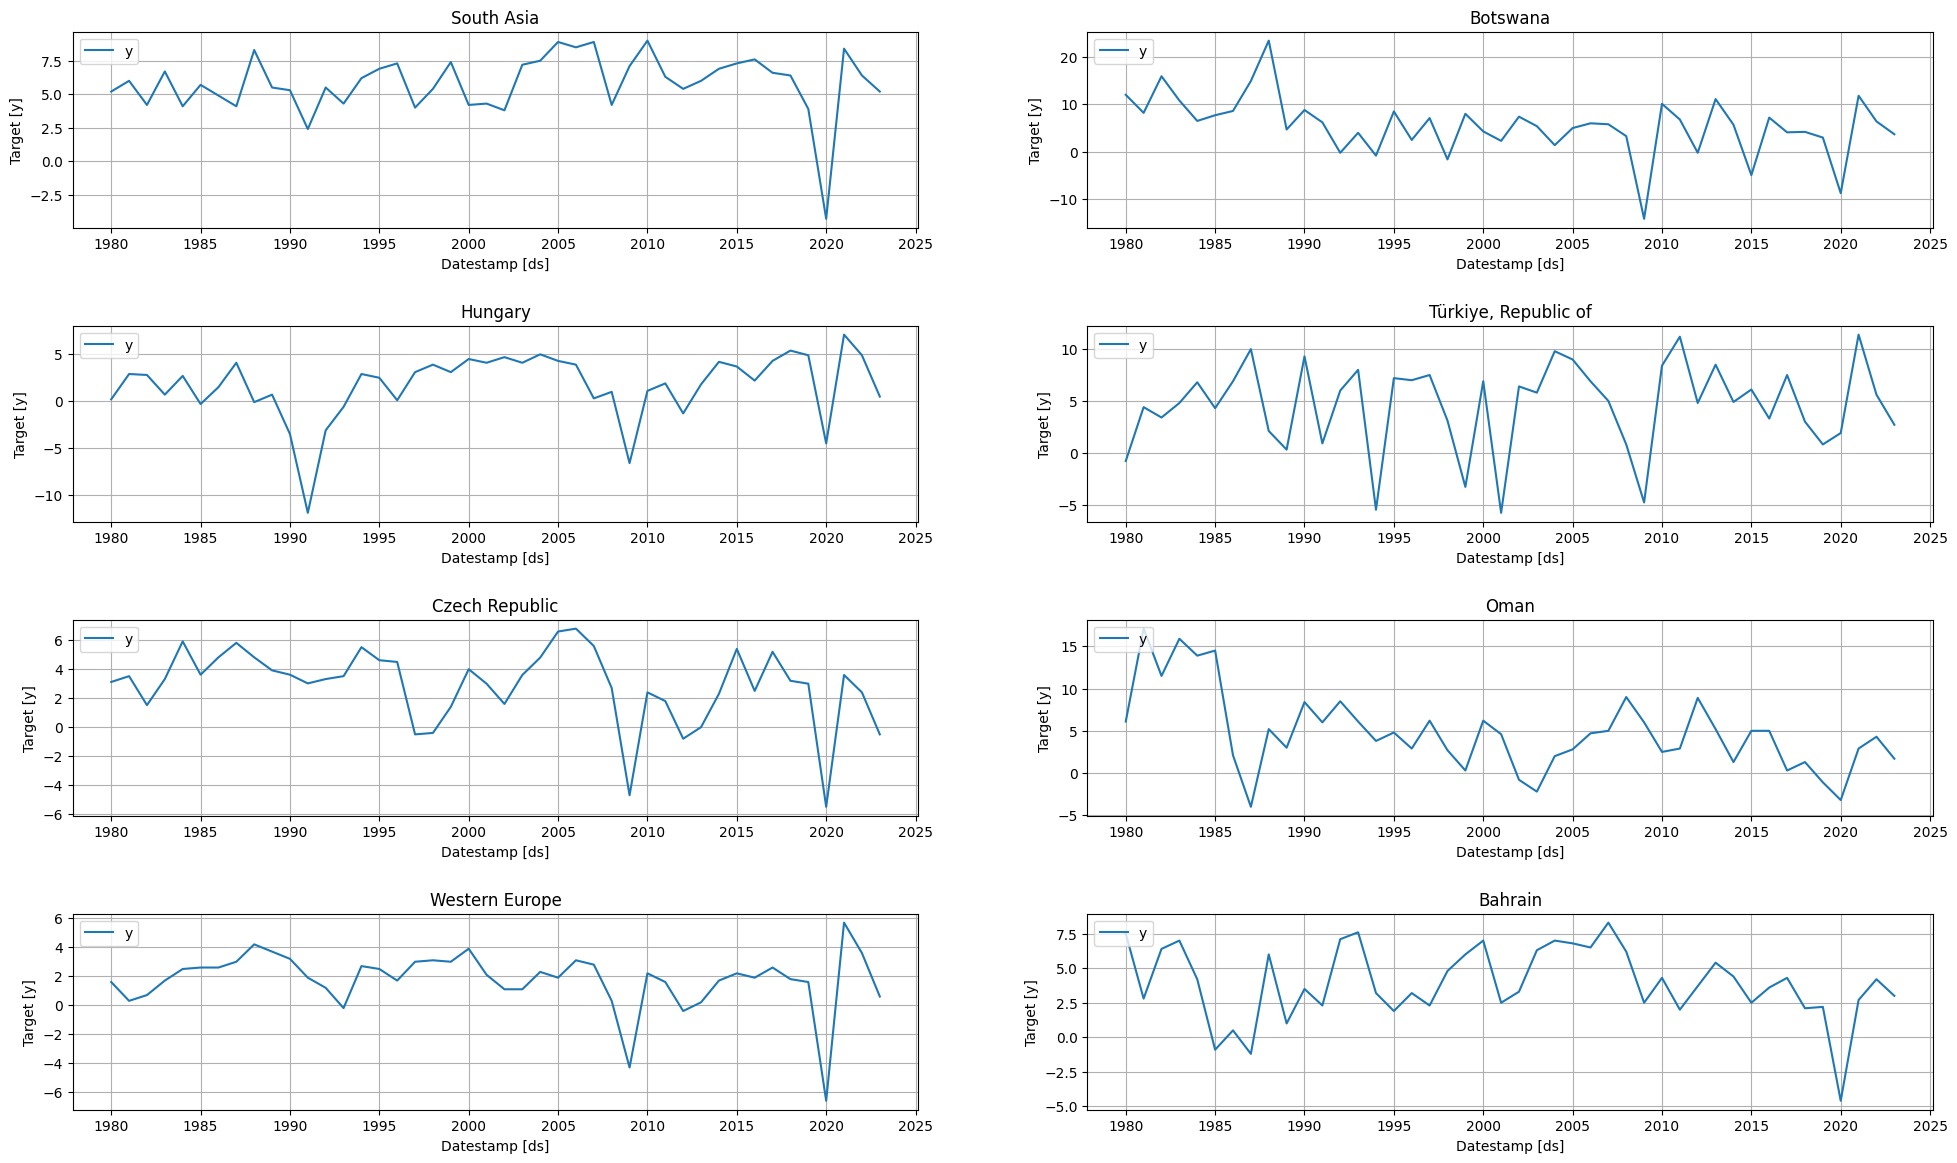

In [8]:
StatsForecast.plot(Y_df, engine="matplotlib")

### Treinamento dos modelos

In [16]:
models = [
    AutoARIMA(season_length=1),
    HistoricAverage(season_length=1),
    DynamicOptimizedTheta()
    RandomWalkWithDrift(),
    HoltWinters()
]

In [17]:
sf = StatsForecast(
    df=Y_df, 
    models=models,
    freq='Y', 
    n_jobs=-1,
)

In [18]:
forecasts_df = sf.forecast(h=5, level=[90])

[08/30/23 19:03:05] WARNING  /home/lineker/indicium/seara_demand_forecast/venv/lib/python3.10/site- ]8;id=169169;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=11349;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             packages/statsforecast/core.py:1240: MatplotlibDeprecationWarning:                    
                                                                                                                   
                             The get_cmap function was deprecated in Matplotlib 3.7 and will be                    
                             removed two minor releases later. Use ``matplotlib.colormaps[name]``                  
                             or ``matplotlib.colormaps.get_cmap(obj)`` instead.                                    
                                                                                                                   
                                                                                                                   

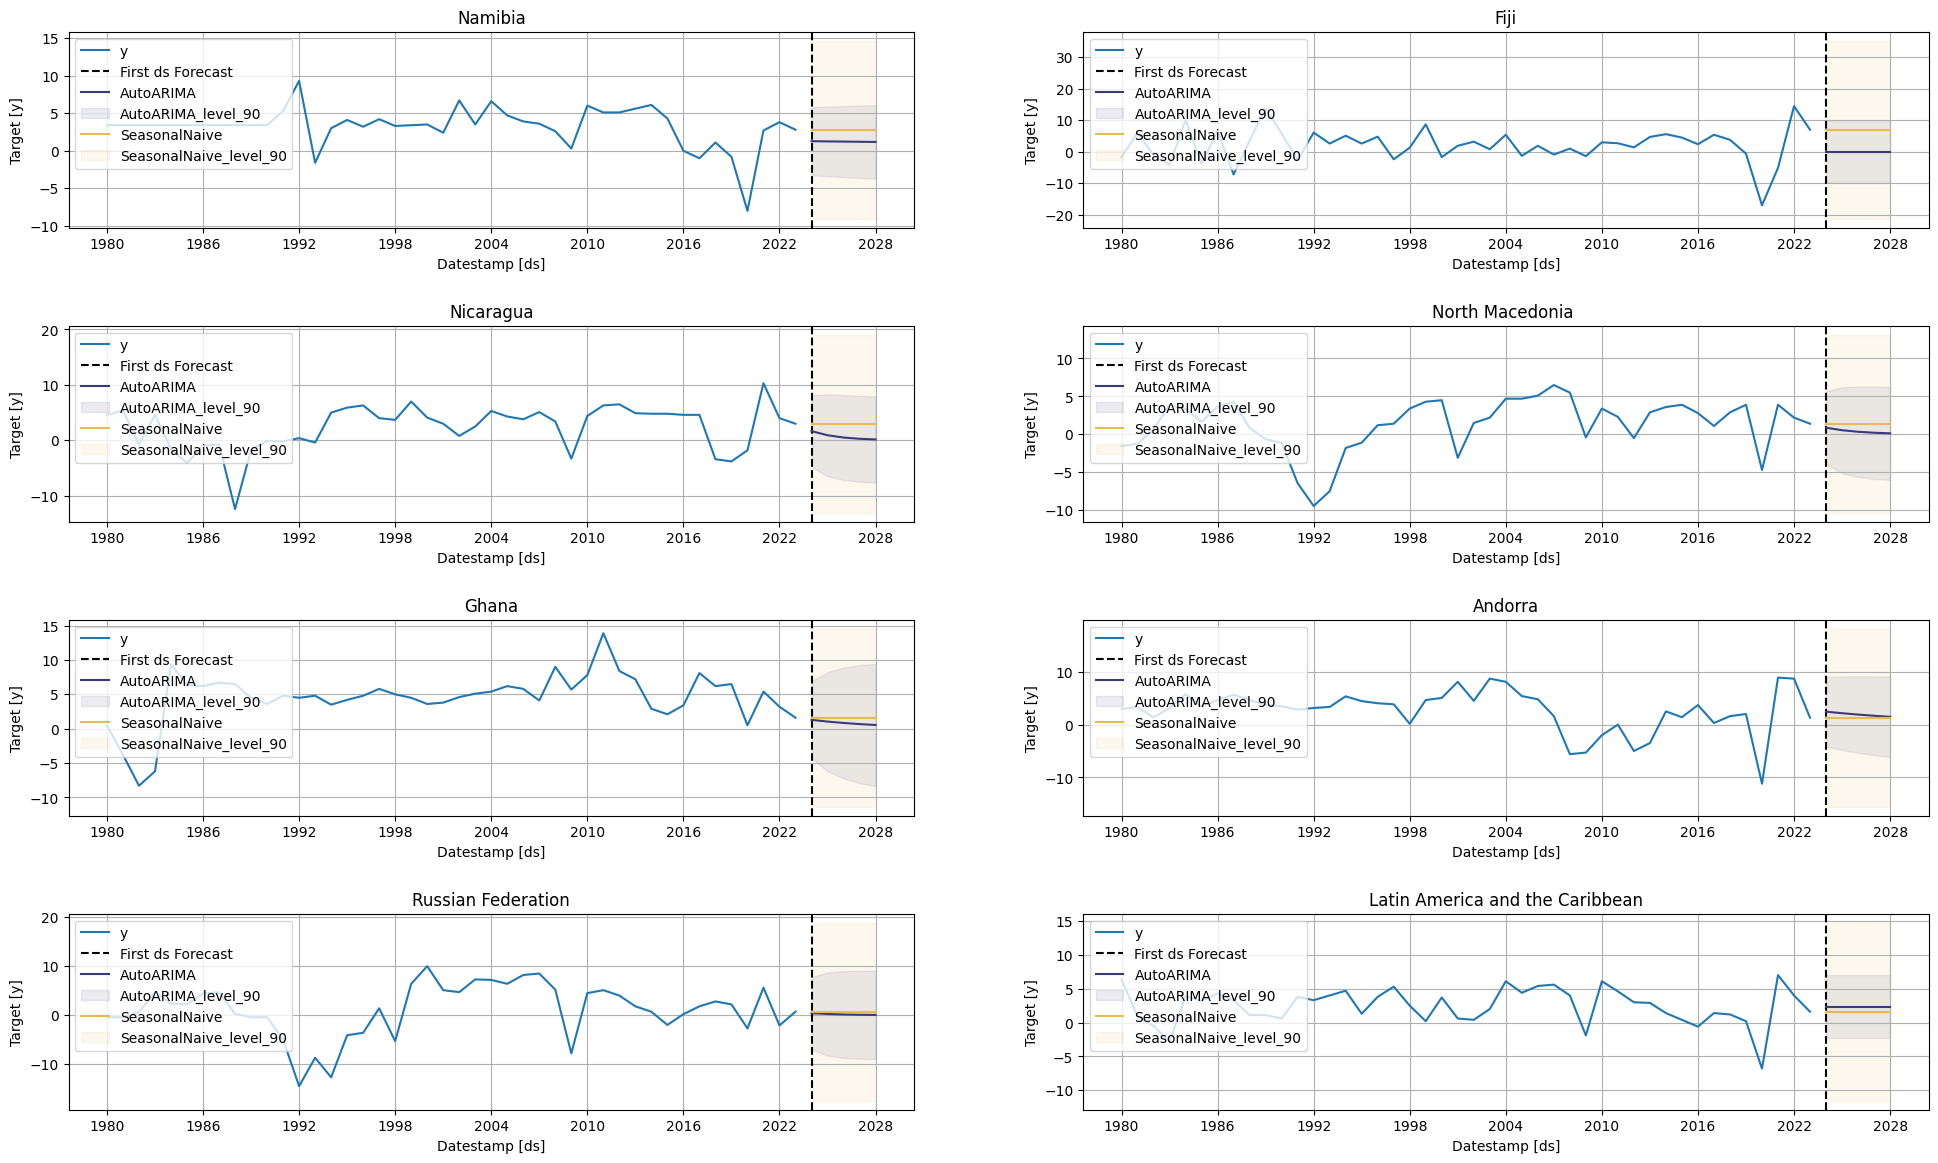

In [19]:
sf.plot(Y_df,forecasts_df, engine="matplotlib")

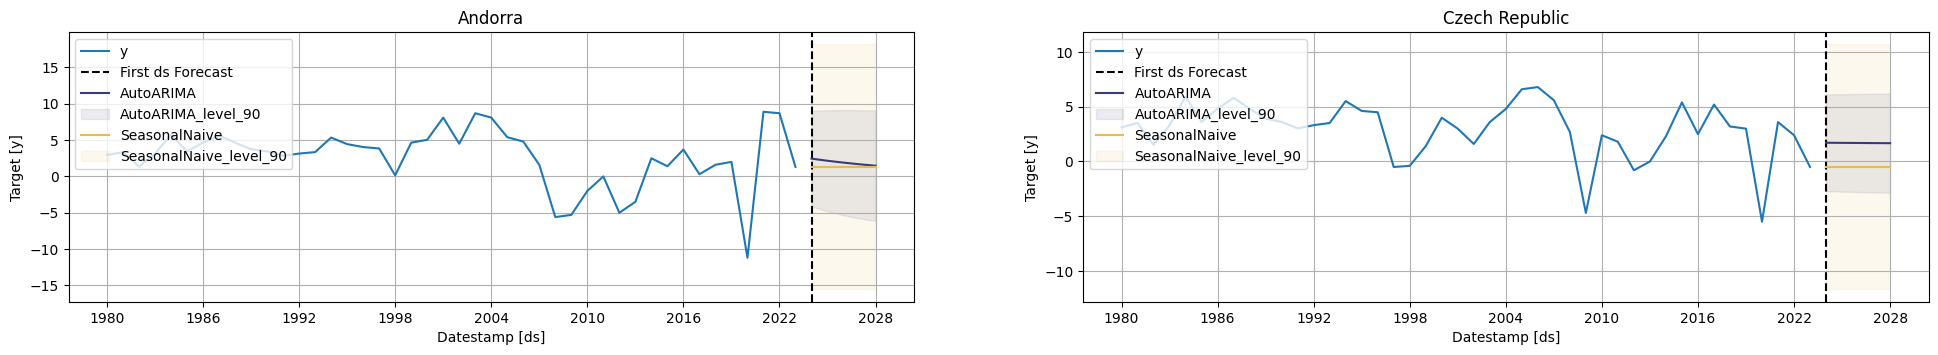

In [20]:
sf.plot(Y_df, forecasts_df, 
        models=["AutoARIMA", "SeasonalNaive"], 
        unique_ids=["Andorra", "Czech Republic"], 
        level=[90], engine="matplotlib")

In [21]:
crossvaldation_df = sf.cross_validation(
    df=Y_df,
    h=5,
    step_size=8,
    n_windows=2
  )

In [22]:
crossvaldation_df.head()

,ds,cutoff,y,AutoARIMA,SeasonalNaive
unique_id,,,,,
ASEAN-5,2011,2010,4.8,5.158542,7.6
ASEAN-5,2012,2010,6.2,4.967506,7.6
ASEAN-5,2013,2010,5.0,4.783544,7.6
ASEAN-5,2014,2010,4.5,4.606395,7.6
ASEAN-5,2015,2010,4.6,4.435806,7.6


In [25]:
def evaluate_cross_validation(df, metric):
    models = df.drop(columns=['ds', 'cutoff', 'y']).columns.tolist()
    evals = []
    for model in models:
        eval_ = df.groupby(['unique_id', 'cutoff']).apply(lambda x: metric(x['y'].values, x[model].values)).to_frame() # Calculate loss for every unique_id, model and cutoff.
        eval_.columns = [model]
        evals.append(eval_)
    evals = pd.concat(evals, axis=1)
    evals = evals.groupby(['unique_id']).mean(numeric_only=True) # Averages the error metrics for all cutoffs for every combination of model and unique_id
    evals['best_model'] = evals.idxmin(axis=1)
    return evals

In [28]:
evaluation_df = evaluate_cross_validation(crossvaldation_df, mse)
evaluation_df.head()

,AutoARIMA,SeasonalNaive,best_model
unique_id,,,
ASEAN-5,8.339975,12.551998,AutoARIMA
Advanced economies,5.439365,6.512000,AutoARIMA
Afghanistan,69.427963,23.053696,SeasonalNaive
Africa (Region),4.005218,5.450001,AutoARIMA
Albania,11.425259,10.332000,SeasonalNaive


In [29]:
summary_df = evaluation_df.groupby('best_model').size().sort_values().to_frame()
summary_df.reset_index().columns = ["Model", "Nr. of unique_ids"]

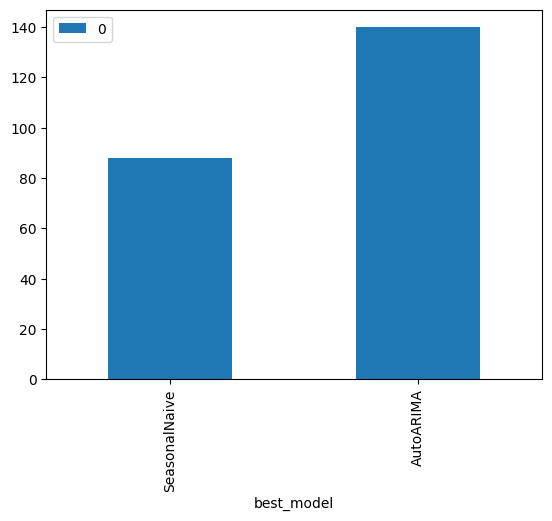

In [34]:
summary_df.plot(kind="bar")
plt.show()

[08/30/23 19:20:09] WARNING  /home/lineker/indicium/seara_demand_forecast/venv/lib/python3.10/site- ]8;id=20786;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=992719;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             packages/statsforecast/core.py:1240: MatplotlibDeprecationWarning:                    
                                                                                                                   
                             The get_cmap function was deprecated in Matplotlib 3.7 and will be                    
                             removed two minor releases later. Use ``matplotlib.colormaps[name]``                  
                             or ``matplotlib.colormaps.get_cmap(obj)`` instead.                                    
                                                                                                                   
                                                                                                                   

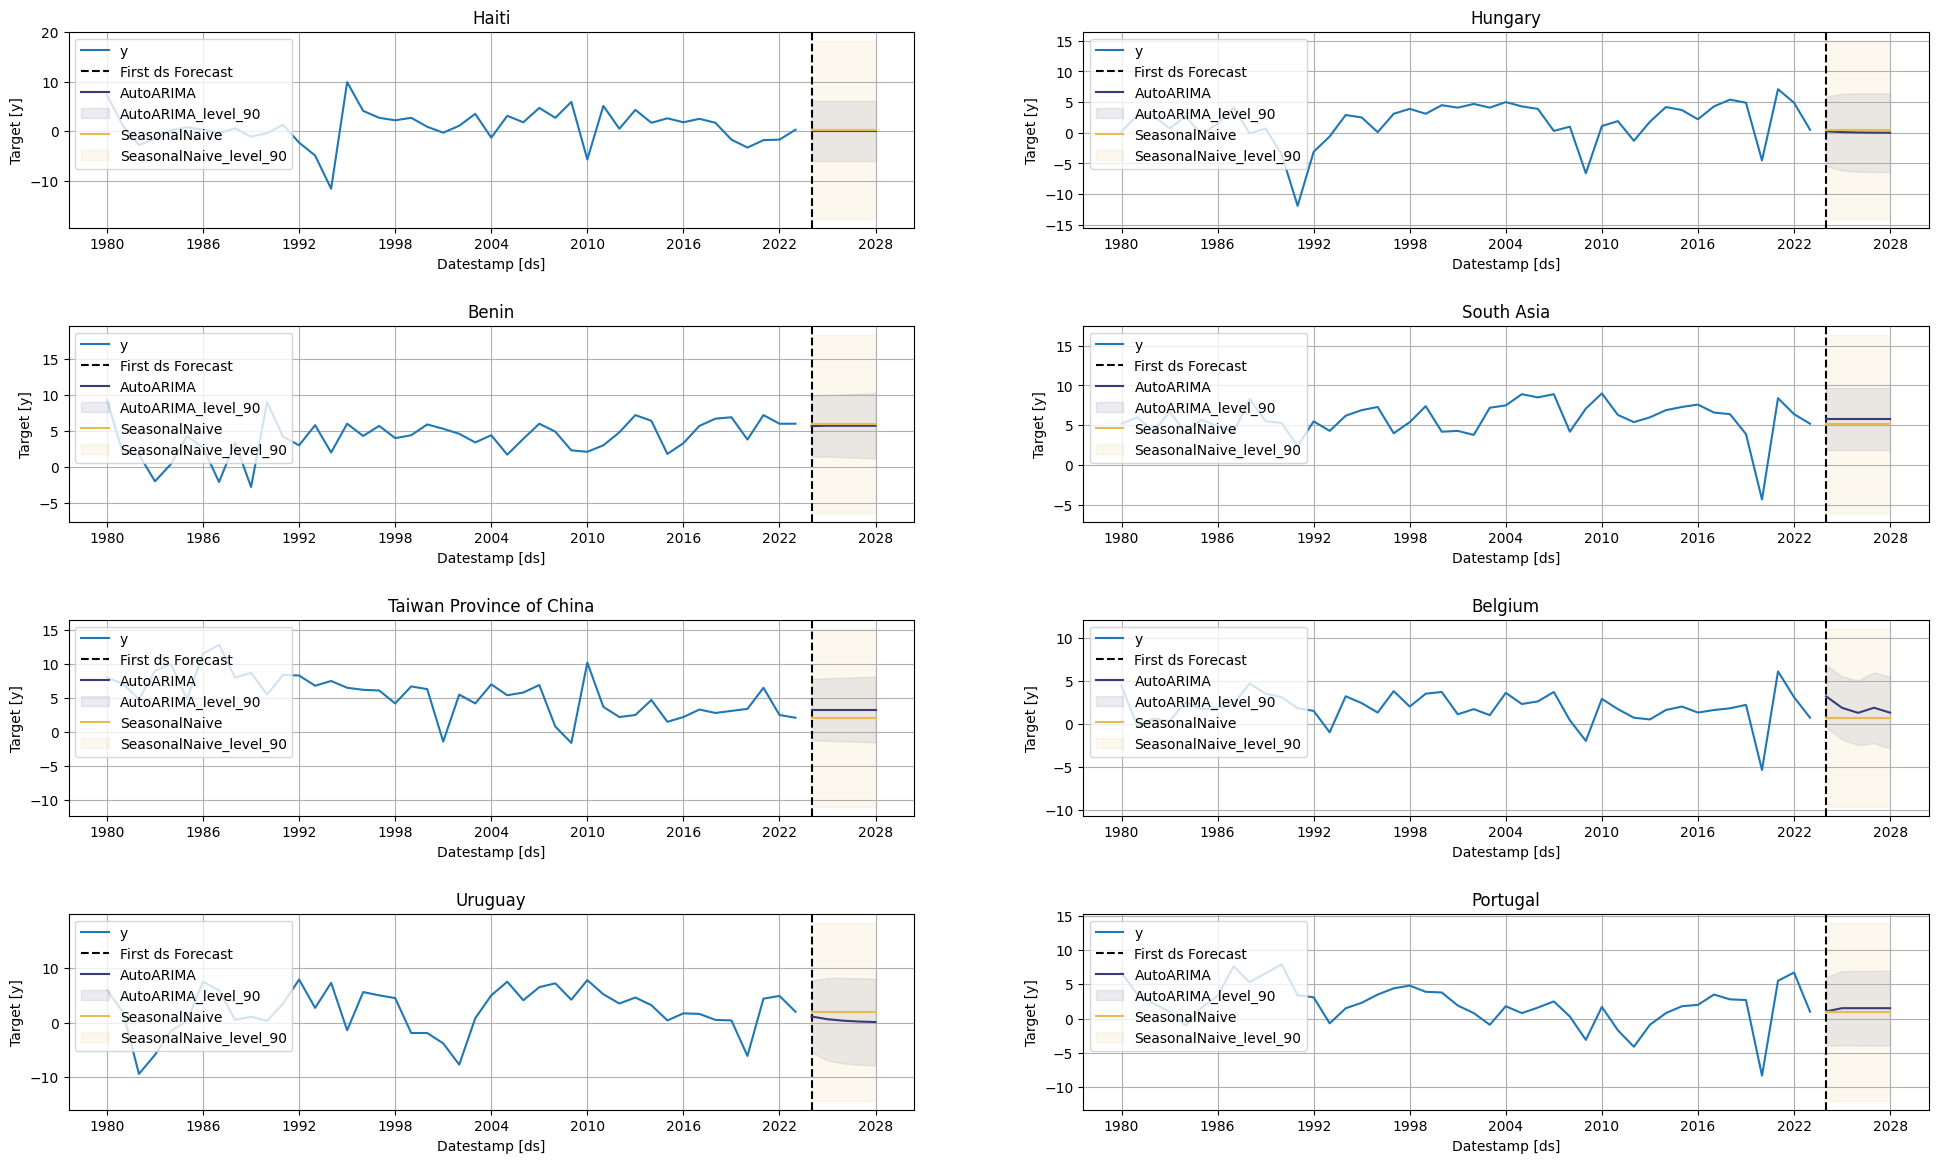

In [37]:
seasonal_ids = evaluation_df.query('best_model == "AutoARIMA"').index
sf.plot(Y_df,forecasts_df, unique_ids=seasonal_ids, models=["AutoARIMA","SeasonalNaive"], engine="matplotlib")

In [38]:
def get_best_model_forecast(forecasts_df, evaluation_df):
    df = forecasts_df.set_index('ds', append=True).stack().to_frame().reset_index(level=2) # Wide to long 
    df.columns = ['model', 'best_model_forecast'] 
    df = df.join(evaluation_df[['best_model']])
    df = df.query('model.str.replace("-lo-90|-hi-90", "", regex=True) == best_model').copy()
    df.loc[:, 'model'] = [model.replace(bm, 'best_model') for model, bm in zip(df['model'], df['best_model'])]
    df = df.drop(columns='best_model').set_index('model', append=True).unstack()
    df.columns = df.columns.droplevel()
    df = df.reset_index(level=1)
    return df

In [39]:
prod_forecasts_df = get_best_model_forecast(forecasts_df, evaluation_df)
prod_forecasts_df.head()

model,ds,best_model,best_model-hi-90,best_model-lo-90
unique_id,,,,
ASEAN-5,2024,4.032939,9.507491,-1.441612
ASEAN-5,2025,4.022299,9.530065,-1.485466
ASEAN-5,2026,4.011687,9.552295,-1.528920
ASEAN-5,2027,4.001103,9.574187,-1.571981
ASEAN-5,2028,3.990547,9.595750,-1.614656


[08/30/23 19:23:42] WARNING  /home/lineker/indicium/seara_demand_forecast/venv/lib/python3.10/site- ]8;id=431798;file:///usr/lib/python3.10/warnings.py\warnings.py]8;;\:]8;id=309378;file:///usr/lib/python3.10/warnings.py#109\109]8;;\
                             packages/statsforecast/core.py:1240: MatplotlibDeprecationWarning:                    
                                                                                                                   
                             The get_cmap function was deprecated in Matplotlib 3.7 and will be                    
                             removed two minor releases later. Use ``matplotlib.colormaps[name]``                  
                             or ``matplotlib.colormaps.get_cmap(obj)`` instead.                                    
                                                                                                                   
                                                                                                                   

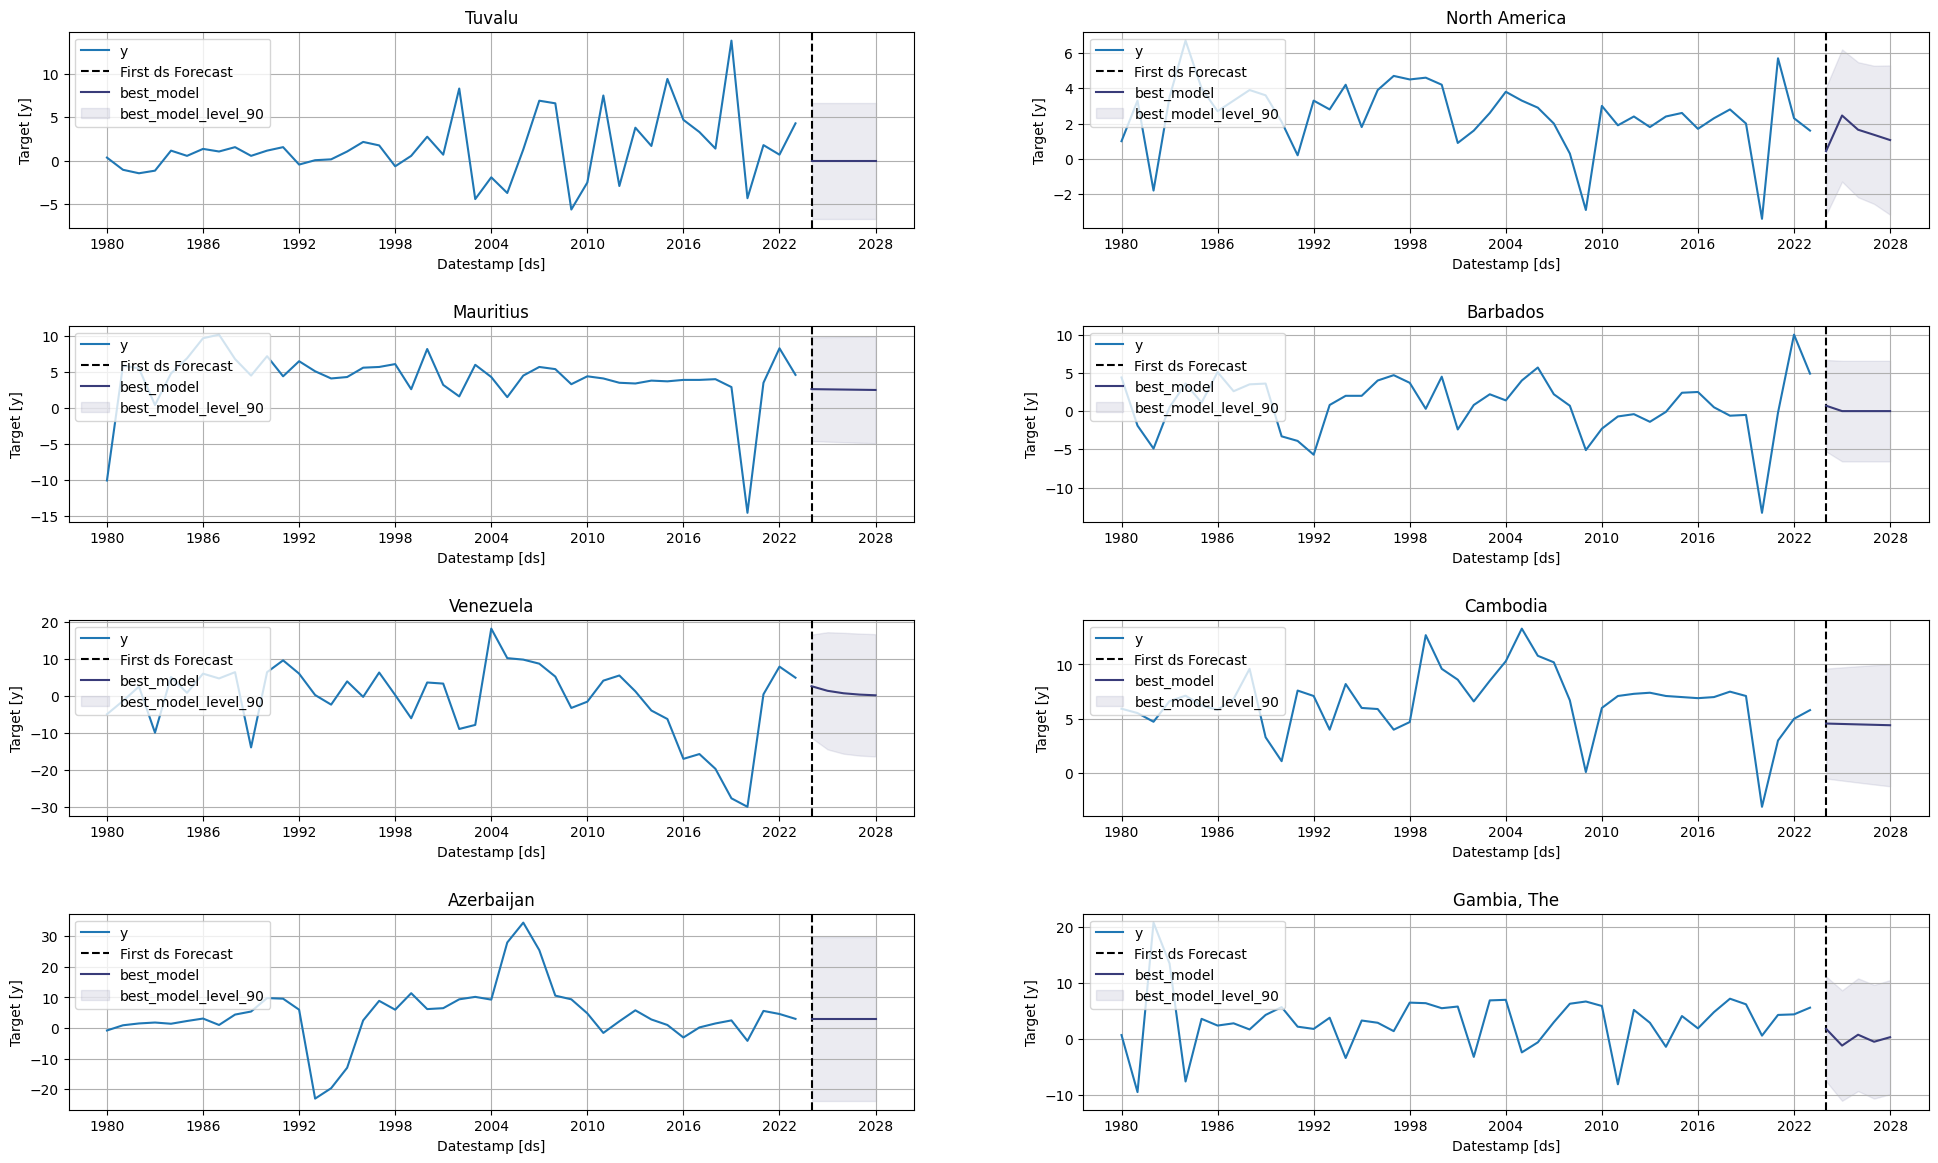

In [41]:
sf.plot(Y_df, prod_forecasts_df, level=[90], engine="matplotlib")